#### Hi all.  🙋
#### In this notebook we will make a gentle intro to **PYCARET**
#### **Enjoy** 🤘

![](https://i1.wp.com/pycaret.org/wp-content/uploads/2020/04/thumbnail.png?fit=1166%2C656&ssl=1)

image credit: https://i1.wp.com/pycaret.org/

<a id="toc"></a>

<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Contents</h3>
    
* [What is PYCARET?](#0)

* [Classification](#1)
    * [Data](#2)
    * [Setup](#3)
    * [Compare Models](#4)
    * [Create a Model](#5) 
    * [Tune a Model](#6)
    * [Evaluate a Model](#7)
    * [Blending & Stacking](#8)    
    
* [Regression](#9)    
    * [Data](#10)
    * [Setup](#11)
    * [Compare Models](#12)
    * [Create a Model](#13) 
    * [Tune a Model](#14)
    * [Evaluate a Model](#15)
    * [Blending & Stacking](#16)
    
* [Conclusion](#17) 
* [References & Further Reading](#18)

<a id="0"></a>
<font color="lightseagreen" size=+2.5><b>What is PYCARET?</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

> ### PyCaret is an **`open-source`**, **`low-code`** machine learning library in Python that automates machine learning workflows. 


> ### PyCaret is essentially a **`Python wrapper`** around several machine learning libraries and frameworks
> ### such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

- Install the libraries

In [32]:
import numpy as np 
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")

- First, let's install the pycaret.

In [33]:
!pip install pycaret

<a id="1"></a>
<font color="lightseagreen" size=+3.5><b>Classification</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="2"></a>
<font color="lightseagreen" size=+1.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

DATA DICTONARY						
						
1	**Age**: 			Age of the patient [years] 		
2	**Sex**:  			 Sex of the patient [M: Male, F: Female] 		
3	**ChestPainType**: 			[TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] 		
4	**RestingBP**:			Resting blood pressure [mm Hg] 		
5	**Cholesterol**:			Serum cholesterol [mm/dl] 		
6	**FastingBS**:			 Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]		
7	**RestingECG**:			 Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] 		
8	**MaxHR**:			Maximum heart rate achieved [Numeric value between 60 and 202]		
9	**ExerciseAngina**:			Exercise-induced angina [Y: Yes, N: No]		
10	**Oldpeak**:			 ST [Numeric value measured in depression] (		
11	**ST_Slope**:			 The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping] 		
12	**HeartDisease**:			 Output class [1: heart disease, 0: Normal] 		

Reference: https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [34]:
df = pd.read_csv('../input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
df['HeartDisease'].value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

- Our Target variable has almost balance data for two class.

In [36]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

<a id="3"></a>
<font color="lightseagreen" size=+1.5><b>Setup</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

- First we will import all of the classification library

In [37]:
from pycaret.classification import *

> This function initializes the training environment and creates the transformation pipeline. Setup function must be called before executing any other function. It takes two mandatory parameters: `data` and `target`. All the other parameters are optional.

In [38]:
clf1 = setup(data = df, 
             target = 'HeartDisease',
             categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], 
             silent = True)

,Description,Value
0,session_id,4525
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(918, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


- It gives us overall picture of our data.

- Let's see some of the default parametrs of the setup

 * **`train_size`**: float = 0.7
 * **`preprocess`**: bool, default = True
 * **`imputation_type`**: str, default = ‘simple’
 * **`normalize`**: bool, default = False
 * **`fix_imbalance`**: bool, default = False   --> When set to True, SMOTE (Synthetic Minority Over-sampling Technique) is applied by default to create synthetic datapoints for minority class.(Since we don't have any imbalance problem, didn't change it)
 * **`fix_imbalance_method`**: obj, default = None --> When `fix_imbalance` is True, ‘imblearn’ compatible object with ‘fit_resample’ method can be passed. When set to None, ‘imblearn.over_sampling.SMOTE’ is used.
 * **`fold_strategy`**: str or sklearn CV generator object, default = ‘stratifiedkfold’
 * **`transformation`**: bool = False, transformation_method: str = 'yeo-johnson',
 * **`remove_outliers`**: bool = False, outliers_threshold: float = 0.05
 * **`remove_multicollinearity`**: bool = False, multicollinearity_threshold: float = 0.9,
 * **`polynomial_features`**: bool = False, polynomial_degree: int = 2
 
 Reference: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup
 

![](https://i2.wp.com/pycaret.org/wp-content/uploads/2020/07/pycaret2-features.png?fit=1033%2C613&ssl=1)

Image credit: https://i2.wp.com/pycaret.org/

<a id="4"></a>
<font color="lightseagreen" size=+1.5><b>Compare Models</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

> This function trains and evaluates performance of all estimators available in the model library using cross validation. 

> The output of this function is a score grid with average cross validated scores. 
Metrics evaluated during CV can be accessed using the get_metrics function. 

- First see which models are included in the classification part of the Pycaret.

In [39]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


- 20 different algo are used in the model comparison.

- Let's compare the models

In [40]:
top3 = compare_models(sort='Recall',n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8769,0.9340,0.9136,0.8684,0.8892,0.7509,0.7550,1.5150
rf,Random Forest Classifier,0.8738,0.9234,0.9108,0.8662,0.8864,0.7446,0.7491,0.3160
et,Extra Trees Classifier,0.8660,0.9228,0.8966,0.8681,0.8789,0.7291,0.7365,0.2900
xgboost,Extreme Gradient Boosting,0.8551,0.9161,0.8935,0.8514,0.8702,0.7066,0.7114,7.9140
gbc,Gradient Boosting Classifier,0.8629,0.9211,0.8904,0.8643,0.8752,0.7229,0.7275,0.0670
ridge,Ridge Classifier,0.8614,0.0000,0.8818,0.8667,0.8725,0.7206,0.7245,0.0110
lda,Linear Discriminant Analysis,0.8614,0.9266,0.8818,0.8667,0.8725,0.7206,0.7245,0.0120
lightgbm,Light Gradient Boosting Machine,0.8613,0.9229,0.8790,0.8691,0.8729,0.7204,0.7227,0.0350
lr,Logistic Regression,0.8536,0.9276,0.8761,0.8587,0.8657,0.7048,0.7085,0.1720
nb,Naive Bayes,0.8412,0.9136,0.8587,0.8495,0.8532,0.6802,0.6821,0.0110


- Model comparison is done by using deafult parameters of the algorithms.
- For classification problems, 'Accuracy' is the default metric for sorting. But for our data, we chose **`Recall`** to s0rt the models.
- Both Catboost and Random Forest are very close with regard to **`Recall`** score

- Let's see some of the deafult parametrs of **`compare_models`**

 * **`include`**: list of str or scikit-learn compatible object, default = None --> To train and evaluate select models, list containing model ID or scikit-learn compatible object can be passed in include param
 * **`exclude`**:  list of str, default = None --> To omit certain models from training and evaluation, pass a list containing model id in the exclude parameter.
 * **`cross_validation`**: bool, default = True
 * **`sort`**: str, default = ‘Accuracy’
 * **`n_select`**: int, default = 1 --> Number of top_n models to return. For example, to select top 3 models use n_select = 3.
 
 Reference: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup
 

In [41]:
top3

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=4525, verbose=0,
                        warm_start=False),
 ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                      criterion='gini', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, max_samples=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                 

<a id="5"></a>
<font color="lightseagreen" size=+1.5><b>Create a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [42]:
catboost = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9590,0.9143,0.9143,0.9143,0.8143,0.8143
1,0.8923,0.9429,0.8857,0.9118,0.8986,0.7838,0.7842
2,0.8750,0.9350,0.9714,0.8293,0.8947,0.7432,0.7574
3,0.8750,0.9537,0.8857,0.8857,0.8857,0.7478,0.7478
4,0.8750,0.9675,0.8571,0.9091,0.8824,0.7493,0.7507
5,0.8594,0.9094,0.8857,0.8611,0.8732,0.7154,0.7158
6,0.9062,0.9360,0.9714,0.8718,0.9189,0.8086,0.8152
7,0.8125,0.8814,0.9118,0.7750,0.8378,0.6190,0.6306
8,0.8594,0.9529,0.8824,0.8571,0.8696,0.7171,0.7174
9,0.9062,0.9020,0.9706,0.8684,0.9167,0.8103,0.8168


<a id="6"></a>
<font color="lightseagreen" size=+1.5><b>Tune a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [44]:

tuned_catboost = tune_model(catboost, optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8615,0.9333,0.8286,0.9062,0.8657,0.7234,0.7265
1,0.8615,0.9286,0.9143,0.8421,0.8767,0.7194,0.7226
2,0.8906,0.9271,1.0000,0.8333,0.9091,0.7746,0.7951
3,0.8906,0.9512,0.9143,0.8889,0.9014,0.7787,0.7790
4,0.8750,0.9567,0.8857,0.8857,0.8857,0.7478,0.7478
5,0.8594,0.9005,0.8857,0.8611,0.8732,0.7154,0.7158
6,0.8750,0.9458,0.9429,0.8462,0.8919,0.7448,0.7509
7,0.7969,0.8662,0.8824,0.7692,0.8219,0.5881,0.5956
8,0.8750,0.9402,0.9118,0.8611,0.8857,0.7480,0.7495
9,0.8906,0.8926,0.9706,0.8462,0.9041,0.7782,0.7882


<a id="7"></a>
<font color="lightseagreen" size=+1.5><b>Evaluate a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [45]:
evaluate_model(tuned_catboost)

,Parameters
nan_mode,Min
eval_metric,Logloss
iterations,90
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


### AUC Plot

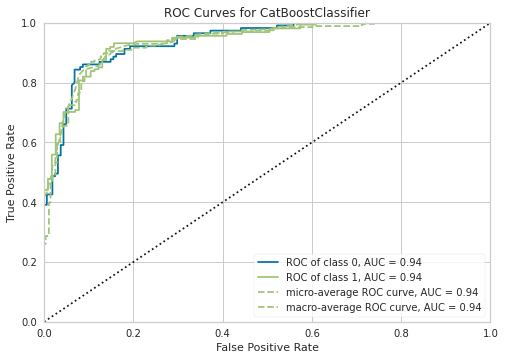

In [46]:
plot_model(tuned_catboost, plot = 'auc')


### Precision-Recall Curve

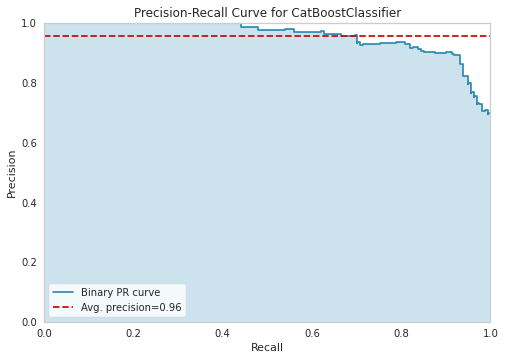

In [47]:
plot_model(tuned_catboost, plot = 'pr')


### Feature Importance

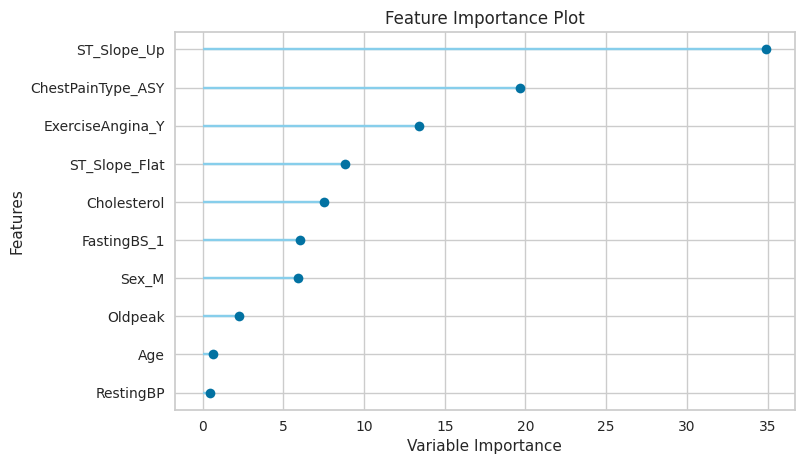

In [48]:
plot_model(tuned_catboost, plot='feature')


### Confusion Matrix

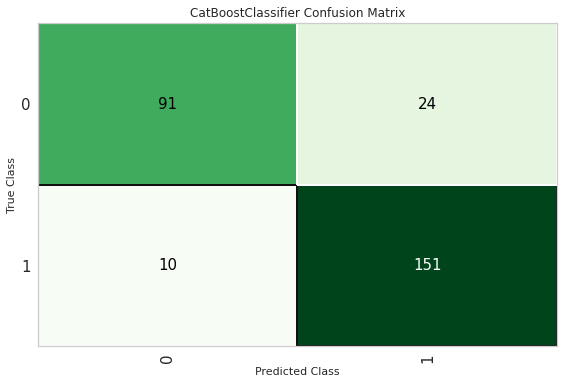

In [49]:
plot_model(tuned_catboost, plot = 'confusion_matrix')


### Predict the Test

In [50]:
predict_model(tuned_catboost);


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8768,0.9401,0.9379,0.8629,0.8988,0.7421,0.7463


<a id="8"></a>
<font color="lightseagreen" size=+1.5><b>Blending & Stacking </b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [51]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3, method = 'soft', optimize = 'Recall')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9077,0.9495,0.9143,0.9143,0.9143,0.8143,0.8143
1,0.8923,0.9390,0.9143,0.8889,0.9014,0.7828,0.7832
2,0.8438,0.9261,0.9429,0.8049,0.8684,0.6790,0.6920
3,0.8594,0.9438,0.8857,0.8611,0.8732,0.7154,0.7158
4,0.9219,0.9675,0.8571,1.0000,0.9231,0.8447,0.8550
5,0.8594,0.9084,0.8857,0.8611,0.8732,0.7154,0.7158
6,0.9062,0.9202,0.9714,0.8718,0.9189,0.8086,0.8152
7,0.8125,0.8863,0.9118,0.7750,0.8378,0.6190,0.6306
8,0.8750,0.9510,0.9118,0.8611,0.8857,0.7480,0.7495
9,0.8906,0.9206,0.9706,0.8462,0.9041,0.7782,0.7882


In [52]:
# stack top3 models from compare_models
stack_soft = stack_models(top3,optimize = 'Recall')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8462,0.9343,0.8286,0.8788,0.8529,0.6919,0.6933
1,0.8923,0.9419,0.8571,0.9375,0.8955,0.7849,0.7882
2,0.8750,0.9340,0.9714,0.8293,0.8947,0.7432,0.7574
3,0.8750,0.9527,0.8857,0.8857,0.8857,0.7478,0.7478
4,0.8750,0.9635,0.8286,0.9355,0.8788,0.7507,0.7566
5,0.8438,0.9084,0.8571,0.8571,0.8571,0.6847,0.6847
6,0.9062,0.9488,0.9429,0.8919,0.9167,0.8097,0.8113
7,0.8125,0.8912,0.9118,0.7750,0.8378,0.6190,0.6306
8,0.8750,0.9314,0.9118,0.8611,0.8857,0.7480,0.7495
9,0.8750,0.9206,0.9118,0.8611,0.8857,0.7480,0.7495


<a id="9"></a>
<font color="lightseagreen" size=+3.5><b>Regression</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

<a id="10"></a>
<font color="lightseagreen" size=+1.5><b>Data</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

DATA DICTONARY						
						
1	**Car_ID**: 			Unique id of each observation 		
2	**Symboling**:  			Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. 		
3	**carCompany**: 			Name of car company 		
4	**fueltype**:			Car fuel type i.e gas or diesel 		
5	**aspiration**:			Aspiration used in a car 		
6	**doornumber**:			Number of doors in a car		
7	**carbody**:			body of car 		
8	**drivewheel**:			type of drive wheel		
9	**enginelocation**:			Location of car engine		
10	**wheelbase**:			Weelbase of car (		
11	**carlength**:			Length of car 		
12	**carwidth**:			Width of car 		
13	**carheight**:			height of car		
14	**curbweight**:			The weight of a car without occupants or baggage. 		
15	**enginetype**:			Type of engine. 		
16	**cylindernumber**:			cylinder placed in the car 		
17	**enginesize**:			Size of car 		
18	**fuelsystem**:			Fuel system of car 		
19	**boreratio**:			Boreratio of car 		
20	**stroke**:			Stroke or volume inside the engine 		
21	**compressionratio**:			compression ratio of car 		
22	**horsepower**:			Horsepower 		
23	**peakrpm**:			car peak rpm 	
24	**citympg**:			Mileage in city 		
25	**highwaympg**:			Mileage on highway 		
26	**price**: 			Price of car 		

Reference: https://www.kaggle.com/hellbuoy/car-price-prediction

In [53]:
df_car = pd.read_csv('../input/car-price-prediction/CarPrice_Assignment.csv')
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [54]:
df_car['model'] = [x.split()[0] for x in df_car['CarName']]
df_car['model'] = df_car['model'].replace({'maxda': 'Mazda','mazda': 'Mazda', 
                                     'nissan': 'Nissan', 
                                     'porcshce': 'Porsche','porsche':'Porsche', 
                                     'toyouta': 'Toyota', 'toyota':'Toyota',
                            'vokswagen': 'Volkswagen', 'vw': 'Volkswagen', 'volkswagen':'Volkswagen'})


In [60]:
from pycaret.regression import *

In [55]:
categorical = df_car.select_dtypes('object').columns

print(f'Categorical Columns: {df_car[categorical].columns}')

Categorical Columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'model'],
      dtype='object')


<a id="11"></a>
<font color="lightseagreen" size=+1.5><b>Setup</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

In [61]:
reg = setup(data = df_car, 
             target = 'price',
             categorical_features = ['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem', 'model']  , 
             ignore_features = ['car_ID','CarName'],
             normalize = True,
             silent = True)

,Description,Value
0,session_id,1834
1,Target,price
2,Original Data,"(205, 27)"
3,Missing Values,False
4,Numeric Features,13
5,Categorical Features,11
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(143, 73)"


<a id="12"></a>
<font color="lightseagreen" size=+1.5><b>Compare Models</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>

> This function trains and evaluates performance of all estimators available in the model library using cross validation. 

> The output of this function is a score grid with average cross validated scores. 
Metrics evaluated during CV can be accessed using the get_metrics function. 

- First see which models are included in the regression part of the Pycaret.

In [62]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


- 25 different regression algo are available to compare.

- Let's compare the models

In [63]:
top_3 = compare_models(sort='RMSE',include=['lightgbm','catboost','xgboost','rf','mlp','gbr','lasso','ridge','et','ada'], n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,1669.0115,5793285.8228,2319.6499,0.9016,0.1491,0.1182,0.0470
catboost,CatBoost Regressor,1691.0696,5942264.4712,2333.5229,0.9079,0.1466,0.1196,1.2580
rf,Random Forest Regressor,1662.9741,5845000.4302,2363.1719,0.8961,0.1514,0.1187,0.3020
et,Extra Trees Regressor,1775.2924,6510373.9419,2506.7670,0.8855,0.1701,0.1291,0.2720
ada,AdaBoost Regressor,2033.0480,7041364.5098,2616.9845,0.8730,0.1955,0.1685,0.0650
xgboost,Extreme Gradient Boosting,1862.8082,7171036.2750,2624.2362,0.8661,0.1685,0.1304,8.2840
ridge,Ridge Regression,1982.4238,7323539.9000,2639.1008,0.8820,0.1803,0.1564,0.0180
lightgbm,Light Gradient Boosting Machine,2121.0389,9380950.1929,2948.7885,0.8547,0.1781,0.1433,0.0230
lasso,Lasso Regression,2299.6221,10776869.2000,3180.7613,0.8161,0.2219,0.1808,0.0200
mlp,MLP Regressor,14266.3072,278500446.5292,16328.7879,-3.3142,4.3632,0.9805,0.2620


- Let's see some of the deafult parametrs of **`compare_models`**

 * **`include`**: list of str or scikit-learn compatible object, default = None --> To train and evaluate select models, list containing model ID or scikit-learn compatible object can be passed in include param
 * **`exclude`**:  list of str, default = None --> To omit certain models from training and evaluation, pass a list containing model id in the exclude parameter.
 * **`cross_validation`**: bool, default = True
 * **`sort`**: str, default = ‘Accuracy’
 * **`n_select`**: int, default = 1 --> Number of top_n models to return. For example, to select top 3 models use n_select = 3.
 
 Reference: https://pycaret.readthedocs.io/en/latest/api/classification.html#pycaret.classification.setup
 

- Model comparison is done by using deafult parameters of the algorithms.
- For regression problems, **`R2`** is the default metric for sorting. But for our data, we chose **`RMSE`** to sort the models.
- Both Gradient Boosting and Catboost are very close with regard to **`RMSE`** score

<a id="13"></a>
<font color="lightseagreen" size=+1.5><b>Create a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [77]:
cat = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1380.6762,3742030.2006,1934.4328,0.9092,0.1474,0.1251
1,1440.8180,3137074.5493,1771.1789,0.9112,0.1299,0.1099
2,1144.1646,2823993.5705,1680.4742,0.9602,0.1184,0.0862
3,1632.3433,5286773.4529,2299.2985,0.8450,0.1878,0.1560
4,2105.2357,6659069.4652,2580.5173,0.8802,0.1787,0.1526
5,2723.4434,15583091.1099,3947.5424,0.8839,0.1835,0.1514
6,2294.5047,10808648.5831,3287.6509,0.9254,0.1445,0.1147
7,1245.3657,3243625.1300,1801.0067,0.9671,0.1006,0.0833
8,1409.3436,4276423.6985,2067.9516,0.8651,0.1505,0.1094
9,1534.8003,3861914.9524,1965.1756,0.9315,0.1246,0.1071


<a id="14"></a>
<font color="lightseagreen" size=+1.5><b>Tune a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [78]:
tuned_cat = tune_model(cat,optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1471.9742,5017233.0267,2239.9181,0.8783,0.1626,0.1342
1,1431.1888,3952682.0413,1988.1353,0.8881,0.1392,0.0991
2,1307.5580,3048236.4643,1745.9199,0.9571,0.1223,0.0988
3,1244.2550,3451975.2233,1857.9492,0.8988,0.1668,0.1306
4,1726.1027,5037080.0489,2244.3440,0.9093,0.1651,0.1313
5,2715.0366,12899428.1951,3591.5774,0.9039,0.1817,0.1594
6,2351.2980,10340763.7574,3215.7058,0.9287,0.1489,0.1169
7,1402.8748,4760037.4155,2181.7510,0.9517,0.1220,0.0942
8,1478.1783,5025246.1090,2241.7061,0.8414,0.1556,0.1089
9,1395.0814,3231450.7471,1797.6236,0.9427,0.1222,0.1015


<a id="15"></a>
<font color="lightseagreen" size=+1.5><b>Evaluate a Model</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [79]:
evaluate_model(tuned_cat)

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,250
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


## Residual Plot

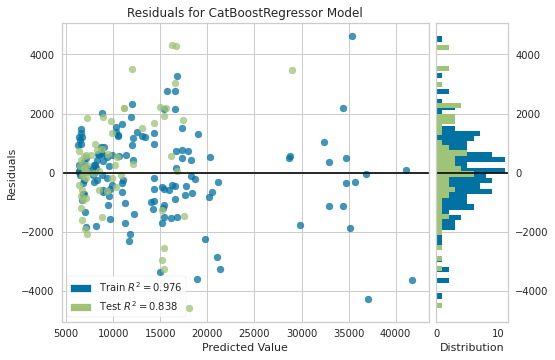

In [80]:
plot_model(tuned_cat)

## Prediction Error Plot

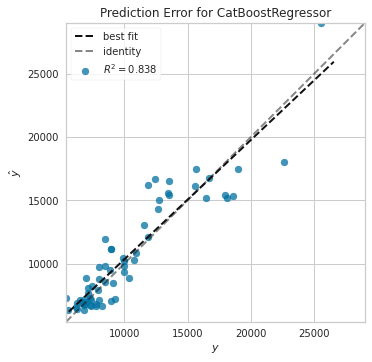

In [81]:
plot_model(tuned_cat, plot = 'error')


## Feature Importance Plot

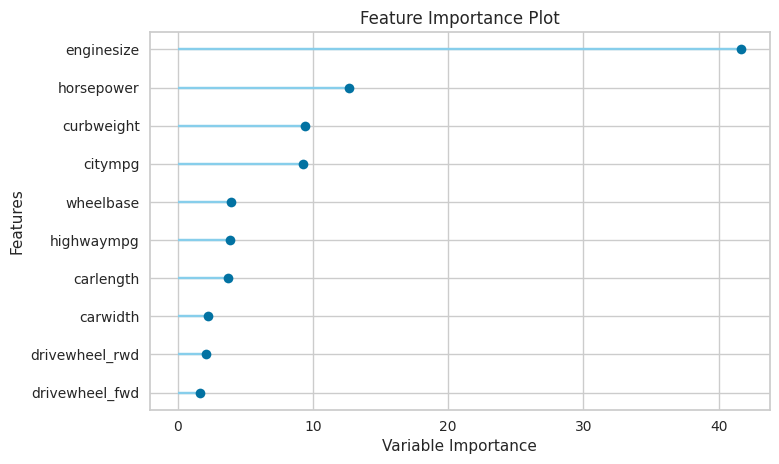

In [82]:
plot_model(tuned_cat, plot='feature')


## Predict on Test

In [83]:
predict_model(tuned_cat);


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1288.1749,3019248.4584,1737.5985,0.8377,0.1448,0.1200


<a id="16"></a>
<font color="lightseagreen" size=+1.5><b>Blending & Stacking </b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In [88]:
# blend top3 models from compare_models
blender_top3 = blend_models(top_3, optimize = 'RMSE')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1423.4708,5014663.4919,2239.3444,0.8783,0.1220,0.1089
1,1604.7895,3882963.7839,1970.5237,0.8900,0.1469,0.1218
2,1130.2451,2969037.3523,1723.0895,0.9582,0.1181,0.0825
3,1564.0341,4710203.2590,2170.3003,0.8619,0.1794,0.1480
4,1994.3607,6799168.4780,2607.5215,0.8776,0.1963,0.1541
5,2244.9495,10985827.9420,3314.4876,0.9181,0.1705,0.1381
6,2197.9881,9298896.3357,3049.4092,0.9358,0.1360,0.1108
7,1053.5224,1958992.6585,1399.6402,0.9801,0.0869,0.0740
8,1450.6949,4461336.1775,2112.1875,0.8592,0.1566,0.1112
9,1305.8761,3437207.2410,1853.9707,0.9390,0.1145,0.0868


In [89]:
# stack top3 models from compare_models
stack_soft = stack_models(top_3,optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2092.9556,8345562.2801,2888.8687,0.7975,0.2695,0.2274
1,2231.7380,7546216.8544,2747.0378,0.7863,0.2273,0.1876
2,1830.5736,4935297.9794,2221.5531,0.9305,0.1801,0.1506
3,1760.9328,6225167.0009,2495.0285,0.8175,0.2270,0.1806
4,2170.0946,7130313.2882,2670.2646,0.8717,0.2534,0.1811
5,3510.8191,22952008.8713,4790.8255,0.8289,0.2188,0.1883
6,3082.9184,16451492.7329,4056.0440,0.8865,0.1977,0.1590
7,2402.2830,11662535.8917,3415.0455,0.8817,0.2545,0.1584
8,2266.5700,12690470.1145,3562.3686,0.5996,0.2522,0.1475
9,3021.0167,17998142.9530,4242.4218,0.6806,0.2580,0.2205


Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.Custom logger is already specified. Specify more than one logger at same time is not thread safe.

<a id="17"></a>
<font color="darkblue" size=+2.5><b>Conclusion</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


In this notebook, we have made a gentle intro to Pycaret library.

- Pycaret is **`open-source`**, **`low-code`** machine learning library 

- PyCaret is essentially a **`Python wrapper`** around several machine learning libraries and frameworks
- I liked to use just one line code to get results and a very user-friendly website of Pycaret.
- I will continue to use different Automated ML libraries, whenever is necessary.
- On the other hand, I will continue to focus on what is going on under the hood and get deep knowledge on the data and problem on the hand.
- If you are looking for a deeper discussion on the automated libraries, please [look at the article by GM @tunguz](https://medium.com/@tunguz/six-levels-of-auto-ml-a277aa1f0f38)


#### By the way, when you like the topic, you can show it by supporting 👍

####  **Feel free to leave a comment**. 

#### All the best 🤘

![](https://media.giphy.com/media/3o7TKUM3IgJBX2as9O/giphy.gif)

gif credit: https://media.giphy.com/

<a id="18"></a>
<font color="darkblue" size=+1.5><b>References & Further Reading</b></font>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Table of Contents</a>


[Machine Learning - Beginner &Intermediate-Friendly BOOKS](https://www.kaggle.com/general/255972)

[PyCaret Website](https://pycaret.readthedocs.io/en/latest/index.html)